<a href="https://colab.research.google.com/github/shailendra31888/first_workshop/blob/main/Bone_Fracture_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bone-fracture-detection-computer-vision-project:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4296838%2F7391382%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T061822Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2962f5304572fe1f718fb1ae8e929e3c1a82e4157b519c9a23159365e25e7f907b4c44c2b08fec1634972c7a852215e08f43feae660b351c03ab36f799c1ee6420491d97a813c0e1f040067d39d359efb0dc9dae1ed1ccdb0736f10f8bacff7d5077007755f3e7daae33eba33cb85d55d51949a76f7875208e0bc0101b31fffcdd66b35da2e3b279bf272307a929bcdfdc2aac3161cefc3d79bf6062bd7d4a6e82571fc7c66128d0dd45c92efce31f571d5cf4a4152ceccd530c6c15ecee2a2b422c6e924097459437856dcfaeb21a7b23fb6b94e2d5484d5c14c03ee9cc8d88e347e7f43dfe461d12c5628faa84a6d5a3856945811f1ba8ff80dfbc25a336d5,bone-fracture-detection-detection-coco-annots:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4302508%2F7399564%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T061822Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2832ec43f150fd586347dcf052082757947d4297e05477d15549243cb8850829b962e4e1b992cd5521428e99eceab5089d93b4d5b4083cc4479bb84f423d0ee27b34f416b309dfe7a90b071b743b951b12bc4b0b7c0ce1d3934d568da8050e9cc5bda06ba053edf8b84e7be83efd3b0ec84a551d728ee1dca6afda51e1aaf9c116799e5f40e621160298c817dfb70f596d2a02b8e103a8e9952a237768fa983154be4abf9d33fad03248130c5629faef3d0924577b3c507715d20926cb6719c0fa5b7854cd4aa4c13505ee53974f443511c798d18418ec3a603c225a65b0e058ccf627a3ad616329326068a4f6db6281907f822873800c95982f8db5e422ed6e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [3]:
import sys, os, distutils.core
from IPython.display import clear_output

!python -m pip install pyyaml==5.1
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))
clear_output()

In [4]:

import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
print("detectron2 version:", detectron2.__version__)

import numpy as np
import os, json, cv2, random
from IPython import display
import PIL
import matplotlib.pyplot as plt

# importing detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


SEED = 9
THRESHOLD = 0.3

detectron2 version: 0.6


In [5]:
# Creating coco instances

from detectron2.data.datasets import register_coco_instances
from detectron2.structures import BoxMode

for d in ["train", "valid", "test"]:
    register_coco_instances(f"bone_fractures_{d}", {},
                            f"../input/bone-fracture-detection-detection-coco-annots/{d}_annotations.coco.json",
                            f"../input/bone-fracture-detection-computer-vision-project/{d}/images")

In [6]:
# Examples from the training dataset

import random
from detectron2.utils.visualizer import Visualizer

my_dataset_train_metadata = MetadataCatalog.get("bone_fractures_train")
train_dataset_dicts = DatasetCatalog.get("bone_fractures_train")

# A function that creates examples from the dataset
def create_random_images(dataset_dict,dataset_metadata, seed, image_scale = 0.7):
    np.random.seed(seed)
    images = np.random.permutation(dataset_dict)[:2]

    fig, axs = plt.subplots(1,2, figsize = (12,6), dpi = 100)
    for i in range(2):
        im = images[i]
        img_link = im['file_name']
        img_id = im['image_id']
        img = cv2.imread(img_link)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        visualizer = Visualizer(img, metadata= dataset_metadata, scale=image_scale)
        vis = visualizer.draw_dataset_dict(im)
        final_img = vis.get_image()

        axs[i].set_title('image id: ' + str(img_id), fontsize = 10)
        axs[i].axis('off')
        axs[i].imshow(final_img)

WARNING [04/25 06:56:47 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/25 06:56:47 d2.data.datasets.coco]: Loaded 3631 images in COCO format from ../input/bone-fracture-detection-detection-coco-annots/train_annotations.coco.json


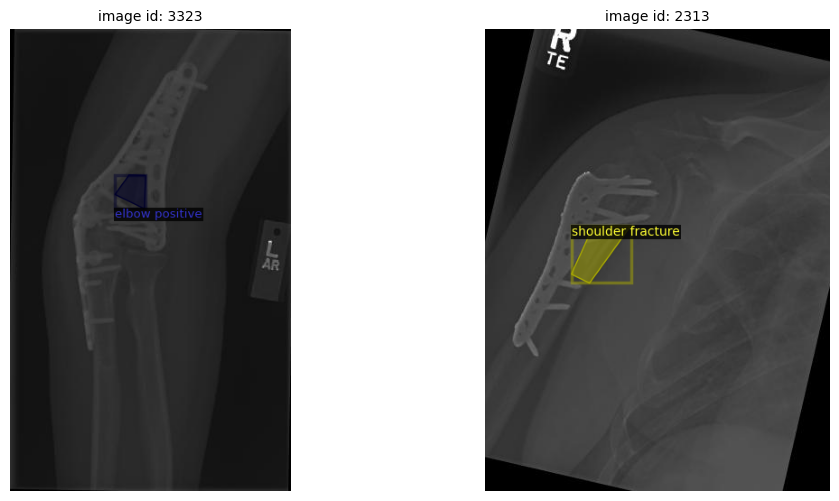

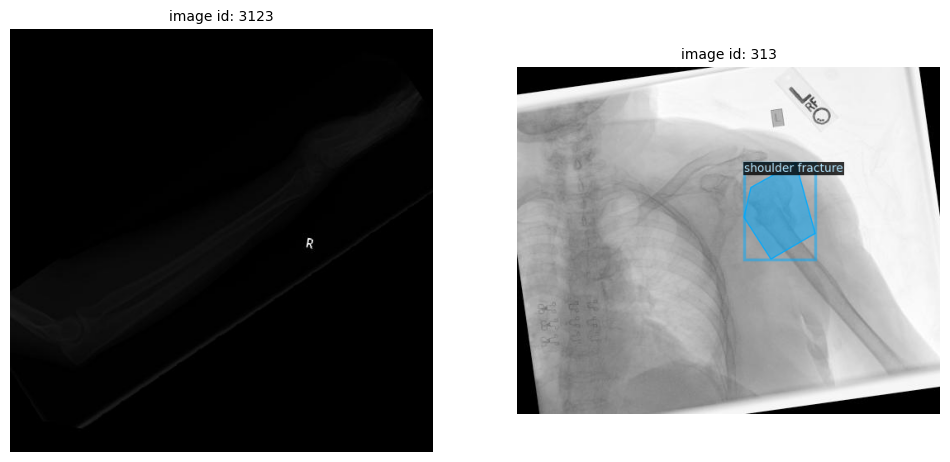

In [7]:
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 3 , image_scale = 1)
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 4 , image_scale = 1)

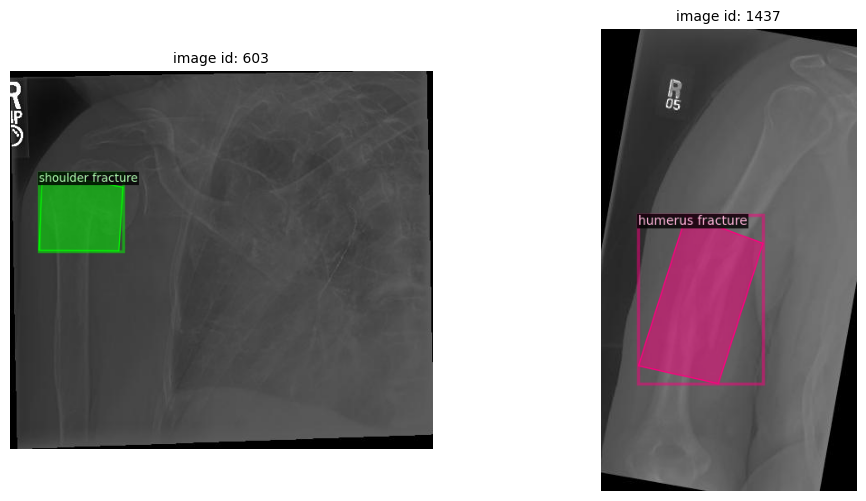

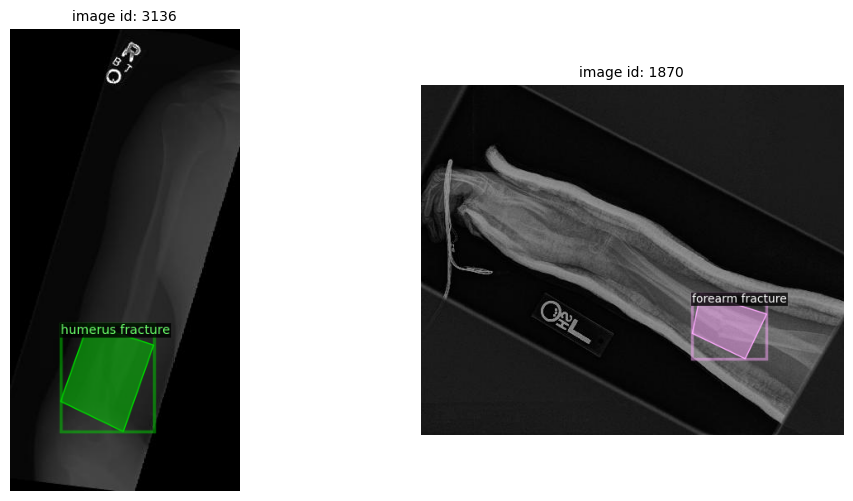

In [8]:
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 5 , image_scale = 1)
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 9 , image_scale = 1)

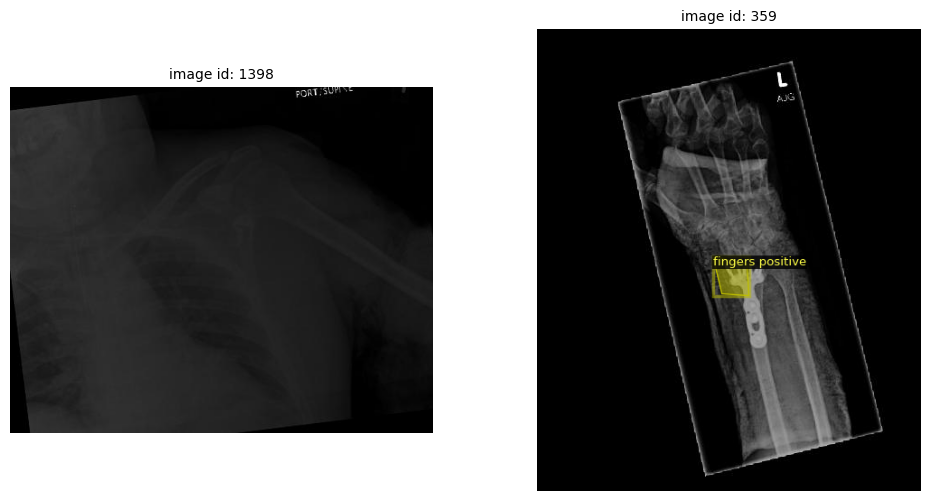

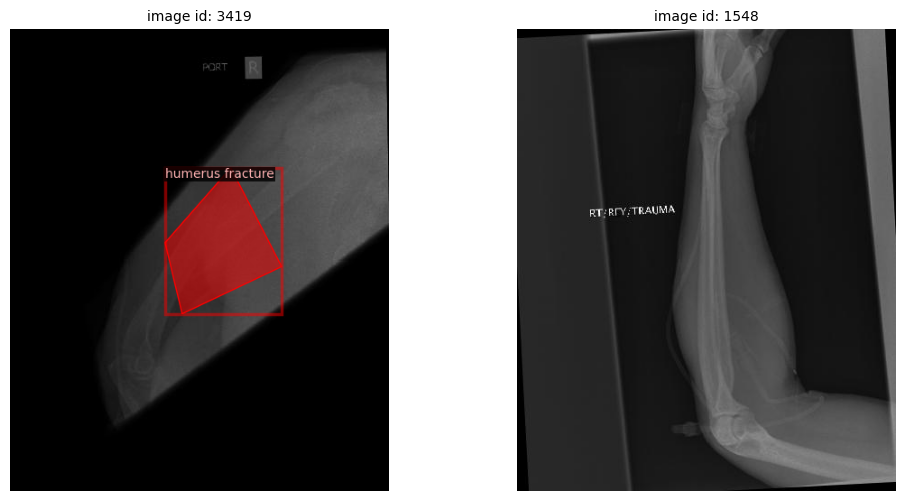

In [8]:
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 7 , image_scale = 1)
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 12 , image_scale = 1)

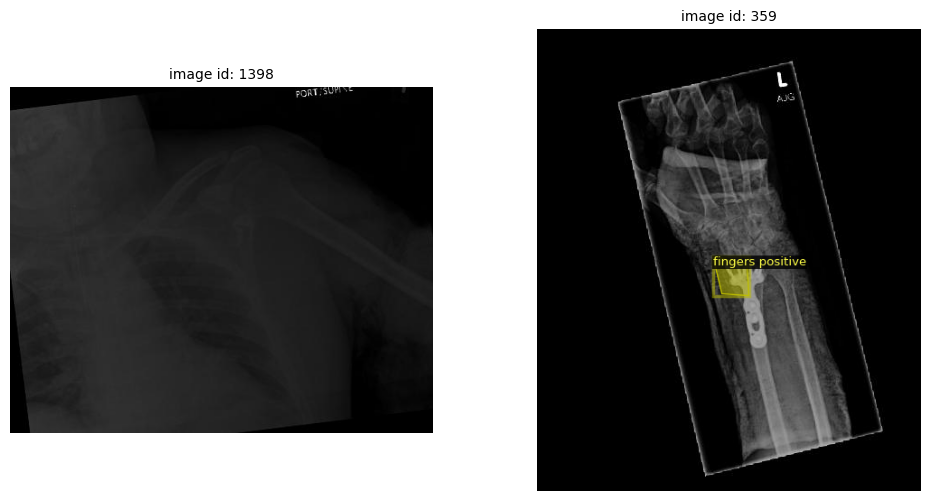

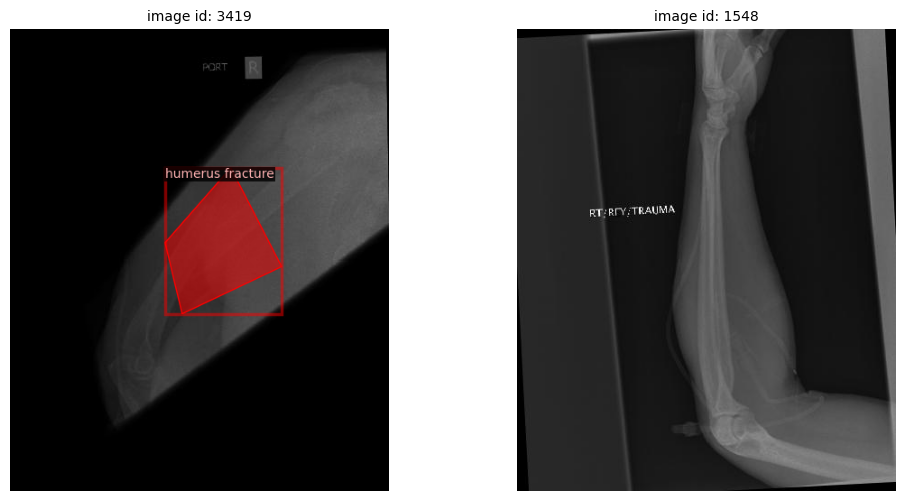

In [9]:
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 7 , image_scale = 1)
create_random_images(train_dataset_dicts, my_dataset_train_metadata, seed = 12 , image_scale = 1)

In [10]:
from detectron2.engine import DefaultTrainer

EPOCHS = 1800
NUM_CLASSES = 8
BASE_LR = 0.001

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("bone_fractures_train")
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = BASE_LR
cfg.SOLVER.MAX_ITER = EPOCHS
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# uncomment below to train
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/25 06:57:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:02, 149MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[04/25 06:57:14 d2.engine.train_loop]: Starting training from iteration 0


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/25 06:57:54 d2.utils.events]:  eta: 1:02:14  iter: 19  total_loss: 2.024  loss_cls: 1.842  loss_box_reg: 0.01533  loss_rpn_cls: 0.1615  loss_rpn_loc: 0.01301    time: 1.8562  last_time: 2.5216  data_time: 0.0164  last_data_time: 0.0126   lr: 1.9981e-05  max_mem: 5909M
[04/25 06:58:33 d2.utils.events]:  eta: 0:56:55  iter: 39  total_loss: 1.261  loss_cls: 0.9821  loss_box_reg: 0.01762  loss_rpn_cls: 0.1666  loss_rpn_loc: 0.01336    time: 1.8244  last_time: 1.9979  data_time: 0.0138  last_data_time: 0.0181   lr: 3.9961e-05  max_mem: 5909M
[04/25 06:59:12 d2.utils.events]:  eta: 0:56:58  iter: 59  total_loss: 0.3976  loss_cls: 0.131  loss_box_reg: 0.005947  loss_rpn_cls: 0.1934  loss_rpn_loc: 0.01216    time: 1.8586  last_time: 2.0816  data_time: 0.0112  last_data_time: 0.0174   lr: 5.9941e-05  max_mem: 5909M
[04/25 06:59:49 d2.utils.events]:  eta: 0:56:18  iter: 79  total_loss: 0.2502  loss_cls: 0.09466  loss_box_reg: 0.03264  loss_rpn_cls: 0.09357  loss_rpn_loc: 0.0105    time: 1.86

In [11]:
# Saving the model

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = THRESHOLD
predictor = DefaultPredictor(cfg)

import pickle
with open("cfg.pkl", "wb") as f:
    pickle.dump(cfg, f)

[04/25 07:55:02 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


# <span style="color:#e74c3c;">Faster R-CNN w/ResNeXt 101 FPN </span> Training Results

In [12]:
# original code from https://eidos-ai.medium.com/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e

def reading_metrics_from_json(metrics_path):
    metrics = []

    with open(metrics_path, 'r') as f:
        for line in f:
            metrics.append(json.loads(line))
    return metrics


def metric(metrics, specific_metric):
    metric = []
    for i in range(len(metrics)):
        try:
            metric.append(metrics[i][specific_metric])
        except KeyError:
            pass

    return metric

In [21]:
train_metrics = reading_metrics_from_json('/content/metrics.json')

total_loss = metric(train_metrics, 'total_loss')
cls_acc = metric(train_metrics, 'fast_rcnn/cls_accuracy')
false_neg = metric(train_metrics, 'fast_rcnn/false_negative')
loss_box_reg = metric(train_metrics, 'loss_box_reg')
iters = np.arange(1,EPOCHS,EPOCHS/len(total_loss))

Text(0.5, 1.0, 'False Negative')

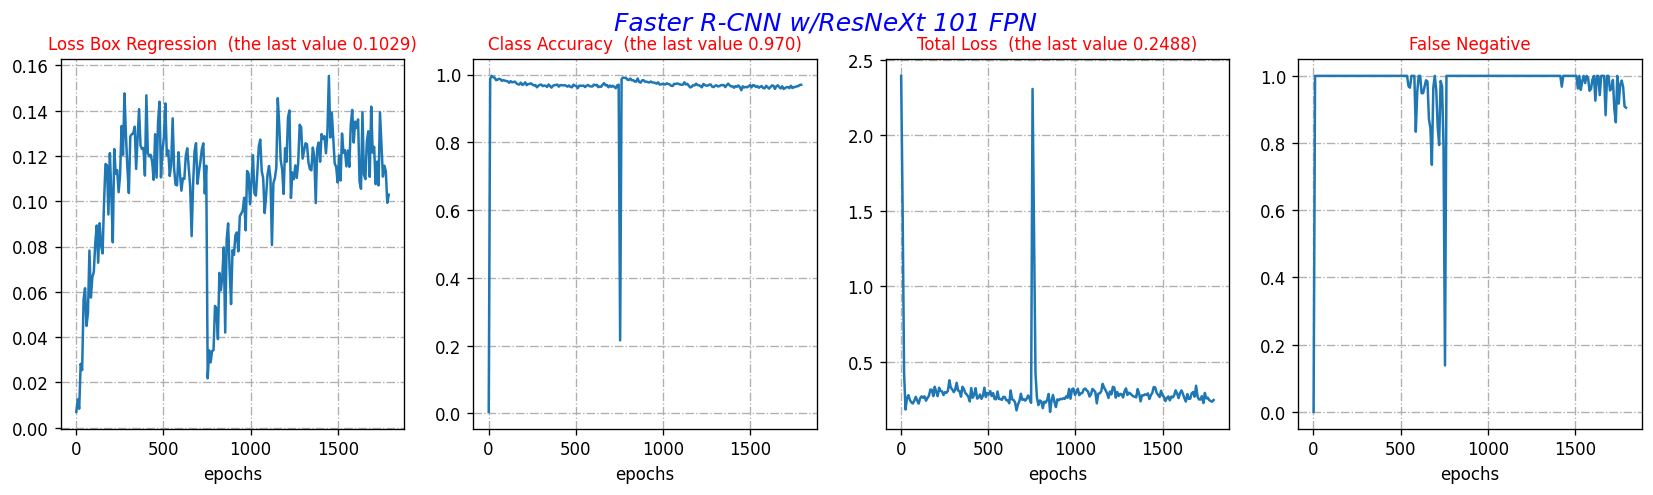

In [22]:
fig, axs = plt.subplots(1,4, figsize = (17, 4), dpi = 120)
fig.suptitle('Faster R-CNN w/ResNeXt 101 FPN', color = 'blue', fontsize=15,  style = "italic")

axs[0].grid(linestyle = 'dashdot')
axs[0].plot(iters, loss_box_reg)
axs[0].set_xlabel('epochs', fontsize = 10)
axs[0].set_title('Loss Box Regression', fontsize = 10)
tit0 = ' (the last value {0:.4f})'.format(loss_box_reg[-1])
axs[0].set_title('Loss Box Regression ' + tit0, fontsize = 10, color = 'red')

axs[1].grid(linestyle = 'dashdot')
axs[1].plot(iters, cls_acc)
axs[1].set_xlabel('epochs', fontsize = 10)
tit1 = ' (the last value {0:.3f})'.format(cls_acc[-1])
axs[1].set_title('Class Accuracy ' + tit1, fontsize = 10, color = 'red')

axs[2].grid(linestyle = 'dashdot')
axs[2].plot(iters, total_loss)
axs[2].set_xlabel('epochs', fontsize = 10)
tit2 = ' (the last value {0:.4f})'.format(total_loss[-1])
axs[2].set_title('Total Loss ' + tit2, fontsize = 10, color = 'red')

axs[3].grid(linestyle = 'dashdot')
axs[3].plot(iters, false_neg)
axs[3].set_xlabel('epochs', fontsize = 10)
axs[3].set_title('False Negative', fontsize = 10, color = 'red')

# <span style="color:#e74c3c;">Faster R-CNN w/ResNeXt 101 FPN </span> Test Results

In [23]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("bone_fractures_test", False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, "bone_fractures_test")
inference_on_dataset(trainer.model, test_loader, evaluator)

[04/25 08:58:39 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [04/25 08:58:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/25 08:58:39 d2.data.datasets.coco]: Loaded 169 images in COCO format from ../input/bone-fracture-detection-detection-coco-annots/test_annotations.coco.json
[04/25 08:58:39 d2.data.build]: Distribution of instances among all 8 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|     bones     | 0            | elbow posit.. | 17           | fingers pos.. | 27           |
| forearm fra.. | 14           |    humerus    | 0            | humerus fra.. | 15           |
| shoulder fr.. | 17           | wrist posit.. | 6            |               |              |
|     total     | 96           |

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[04/25 08:58:42 d2.evaluation.evaluator]: Inference done 11/169. Dataloading: 0.0015 s/iter. Inference: 0.2326 s/iter. Eval: 0.0002 s/iter. Total: 0.2343 s/iter. ETA=0:00:37
[04/25 08:58:47 d2.evaluation.evaluator]: Inference done 33/169. Dataloading: 0.0024 s/iter. Inference: 0.2302 s/iter. Eval: 0.0003 s/iter. Total: 0.2331 s/iter. ETA=0:00:31
[04/25 08:58:52 d2.evaluation.evaluator]: Inference done 54/169. Dataloading: 0.0031 s/iter. Inference: 0.2337 s/iter. Eval: 0.0003 s/iter. Total: 0.2372 s/iter. ETA=0:00:27
[04/25 08:58:57 d2.evaluation.evaluator]: Inference done 76/169. Dataloading: 0.0029 s/iter. Inference: 0.2314 s/iter. Eval: 0.0003 s/iter. Total: 0.2347 s/iter. ETA=0:00:21
[04/25 08:59:02 d2.evaluation.evaluator]: Inference done 97/169. Dataloading: 0.0028 s/iter. Inference: 0.2330 s/iter. Eval: 0.0003 s/iter. Total: 0.2361 s/iter. ETA=0:00:17
[04/25 08:59:07 d2.evaluation.evaluator]: Inference done 117/169. Dataloading: 0.0029 s/iter. Inference: 0.2354 s/iter. Eval: 0.00

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[04/25 08:59:21 d2.evaluation.evaluator]: Total inference time: 0:00:40.022921 (0.244042 s / iter per device, on 1 devices)
[04/25 08:59:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:39 (0.240198 s / iter per device, on 1 devices)
[04/25 08:59:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[04/25 08:59:21 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[04/25 08:59:21 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.028
 Average

OrderedDict([('bbox',
              {'AP': 4.649684165242196,
               'AP50': 12.482097082624287,
               'AP75': 2.8490374485684535,
               'APs': 0.05723398426799201,
               'APm': 3.9687014747435483,
               'APl': 8.211246628365474,
               'AP-bones': nan,
               'AP-elbow positive': 2.944267007345895,
               'AP-fingers positive': 1.1679183204172603,
               'AP-forearm fracture': 13.372426528367122,
               'AP-humerus': nan,
               'AP-humerus fracture': 6.33961444075513,
               'AP-shoulder fracture': 1.2520965163499458,
               'AP-wrist positive': 2.821782178217822})])

# <span style="color:#e74c3c;">Faster R-CNN w/ResNeXt 101 FPN </span> Test Predictions

In [24]:
my_dataset_test_metadata = MetadataCatalog.get("bone_fractures_test")
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("bone_fractures_test")


# A function for plotting an original image's bbox and predicted bbox
def create_predictions(dataset_dict, dataset_metadata, seed, image_scale = 0.8):
    np.random.seed(seed=seed)
    images = np.random.permutation(dataset_dict)[:3]

    fig, axs = plt.subplots(3,2, figsize = (10,15), dpi = 200)

    for i in range(3):
        im = images[i]
        img_link = im['file_name']
        img_id = im['image_id']
        img = cv2.imread(img_link)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        visualizer1 = Visualizer(img, metadata= dataset_metadata, scale=image_scale)

        vis_original = visualizer1.draw_dataset_dict(im)
        original_bbox = vis_original.get_image()

        visualizer2 = Visualizer(img, metadata= dataset_metadata, scale=image_scale)
        outputs = predictor(img)
        out = visualizer2.draw_instance_predictions(outputs["instances"].to("cpu"))
        out_img = cv2.cvtColor(out.get_image(), cv2.COLOR_BGR2RGB)
        final_bbox = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)

        axs[i][0].set_title('original bbox (id: ' + str(img_id) +')', fontsize = 8)
        axs[i][0].axis('off')
        axs[i][0].imshow(original_bbox)

        axs[i][1].set_title('predicted bbox (id: ' + str(img_id) +')', fontsize = 8)
        axs[i][1].axis('off')
        axs[i][1].imshow(final_bbox)

WARNING [04/25 08:59:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/25 08:59:42 d2.data.datasets.coco]: Loaded 169 images in COCO format from ../input/bone-fracture-detection-detection-coco-annots/test_annotations.coco.json


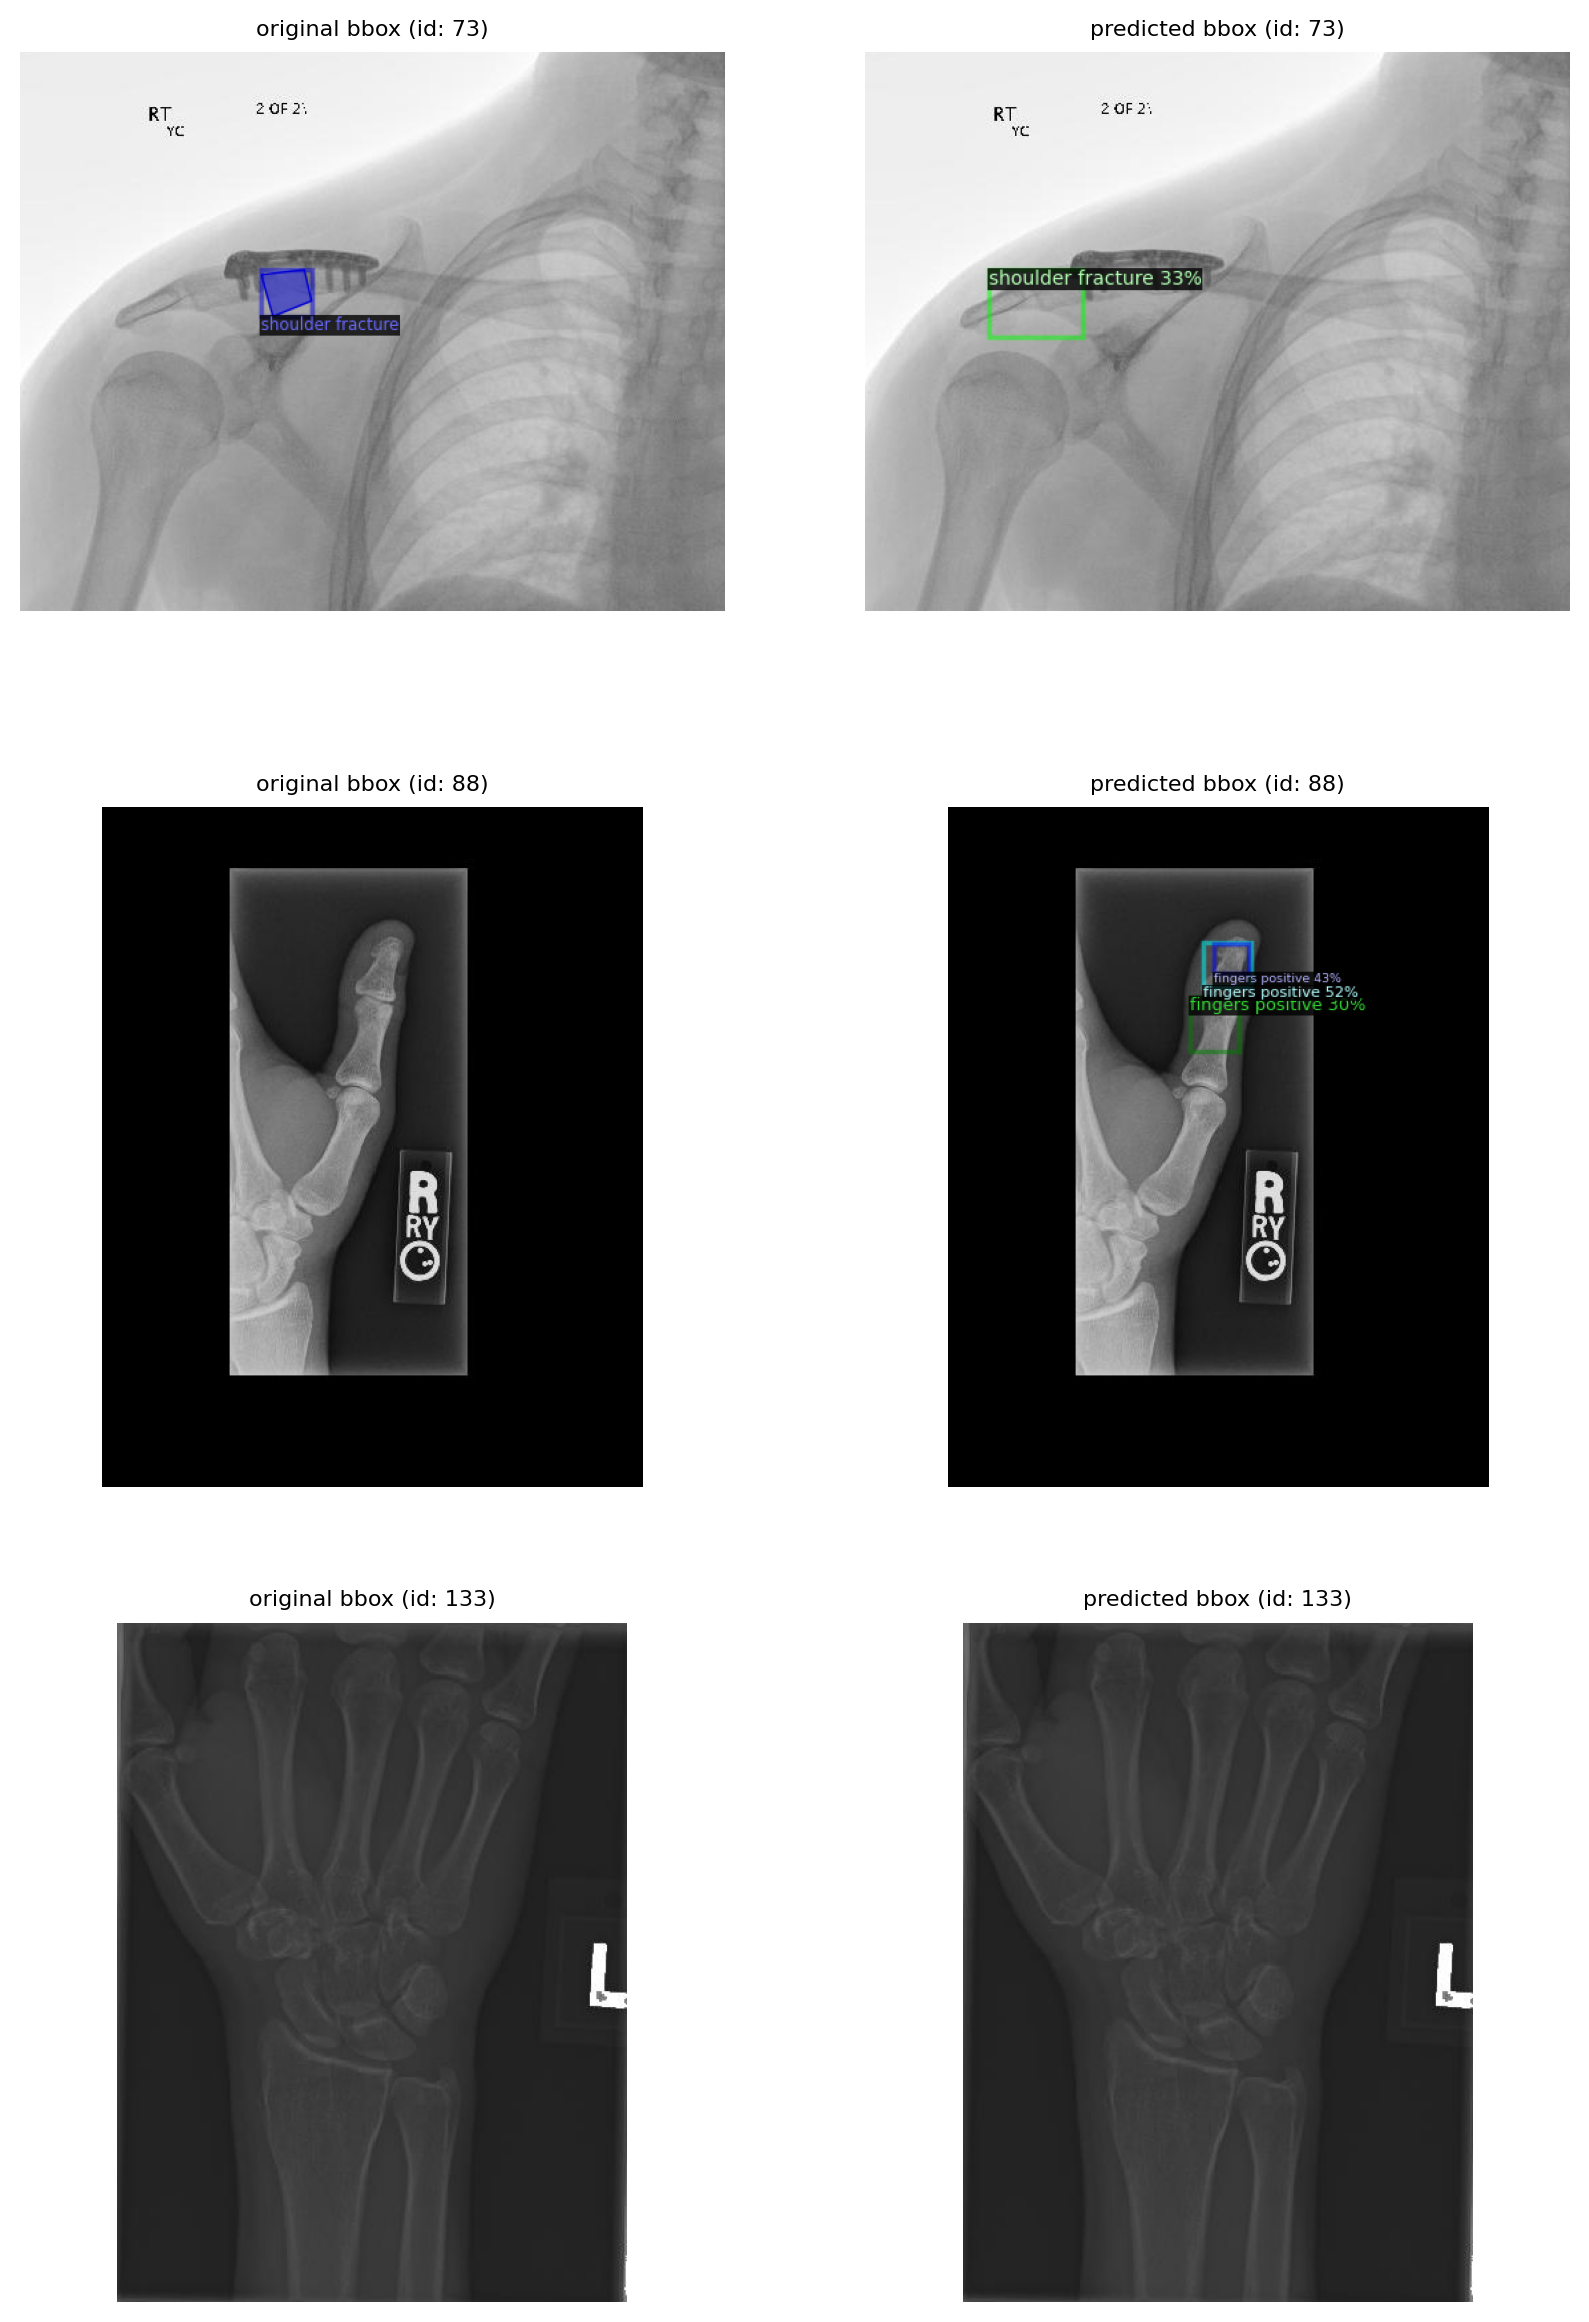

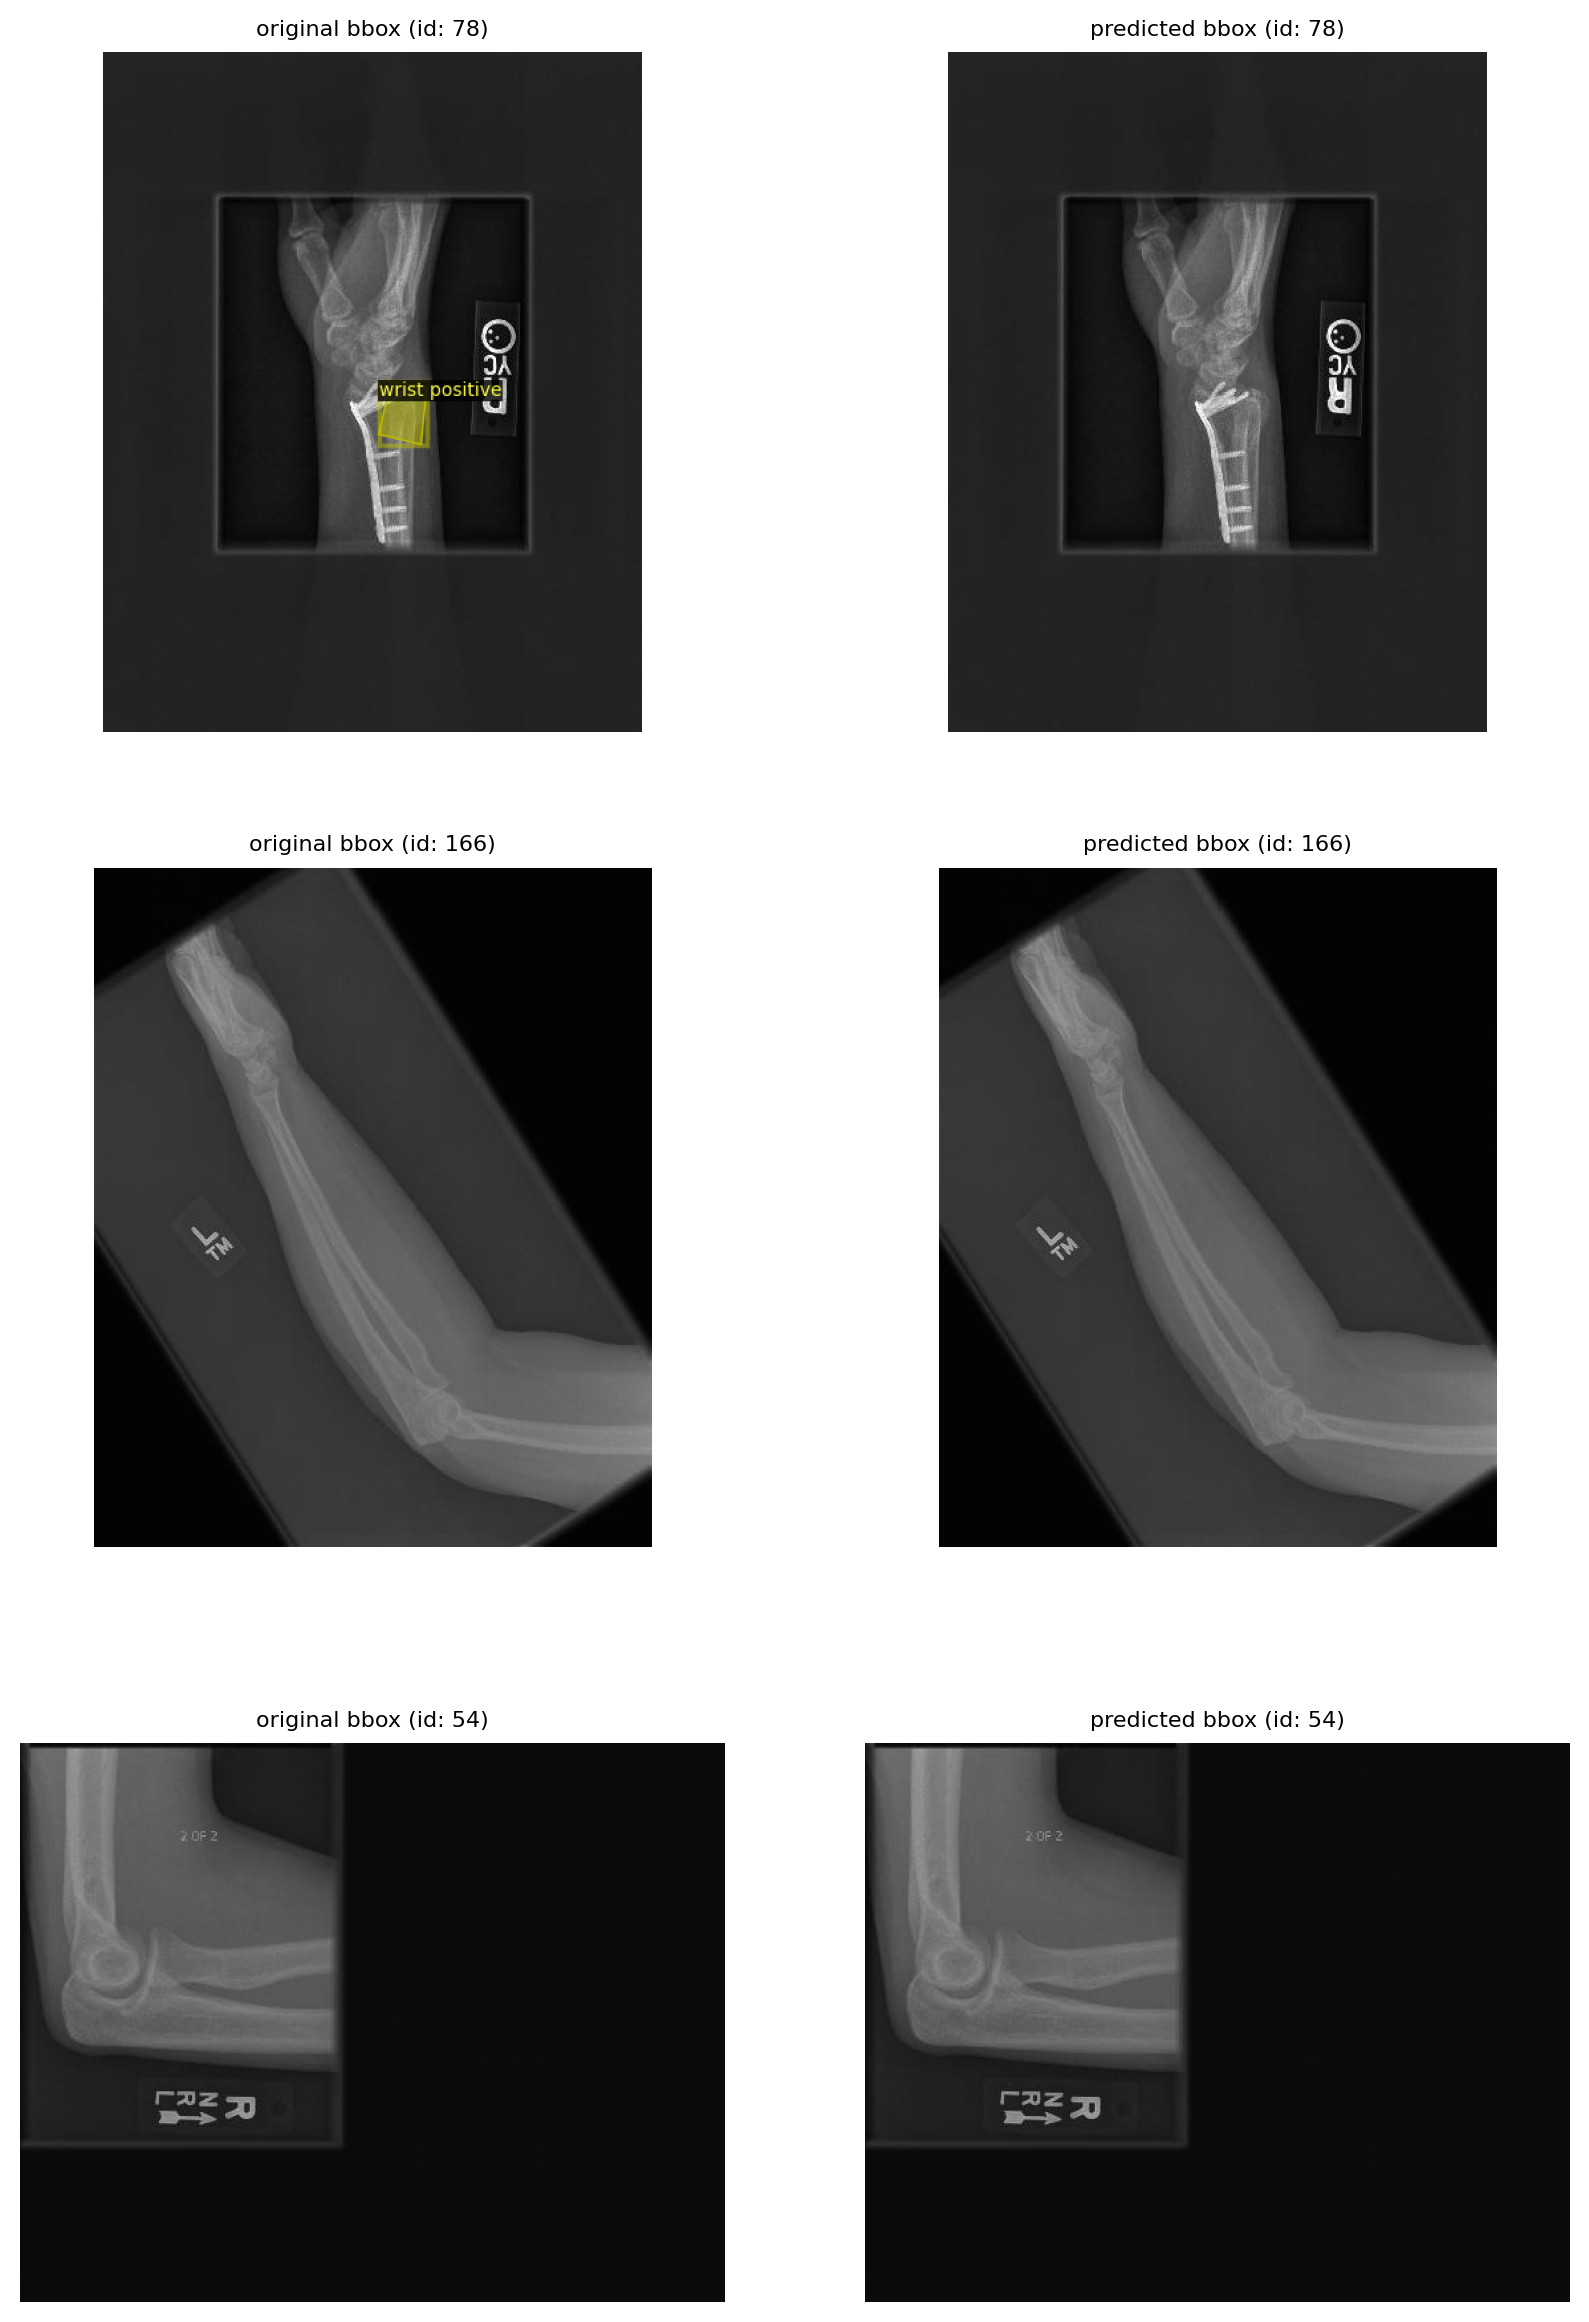

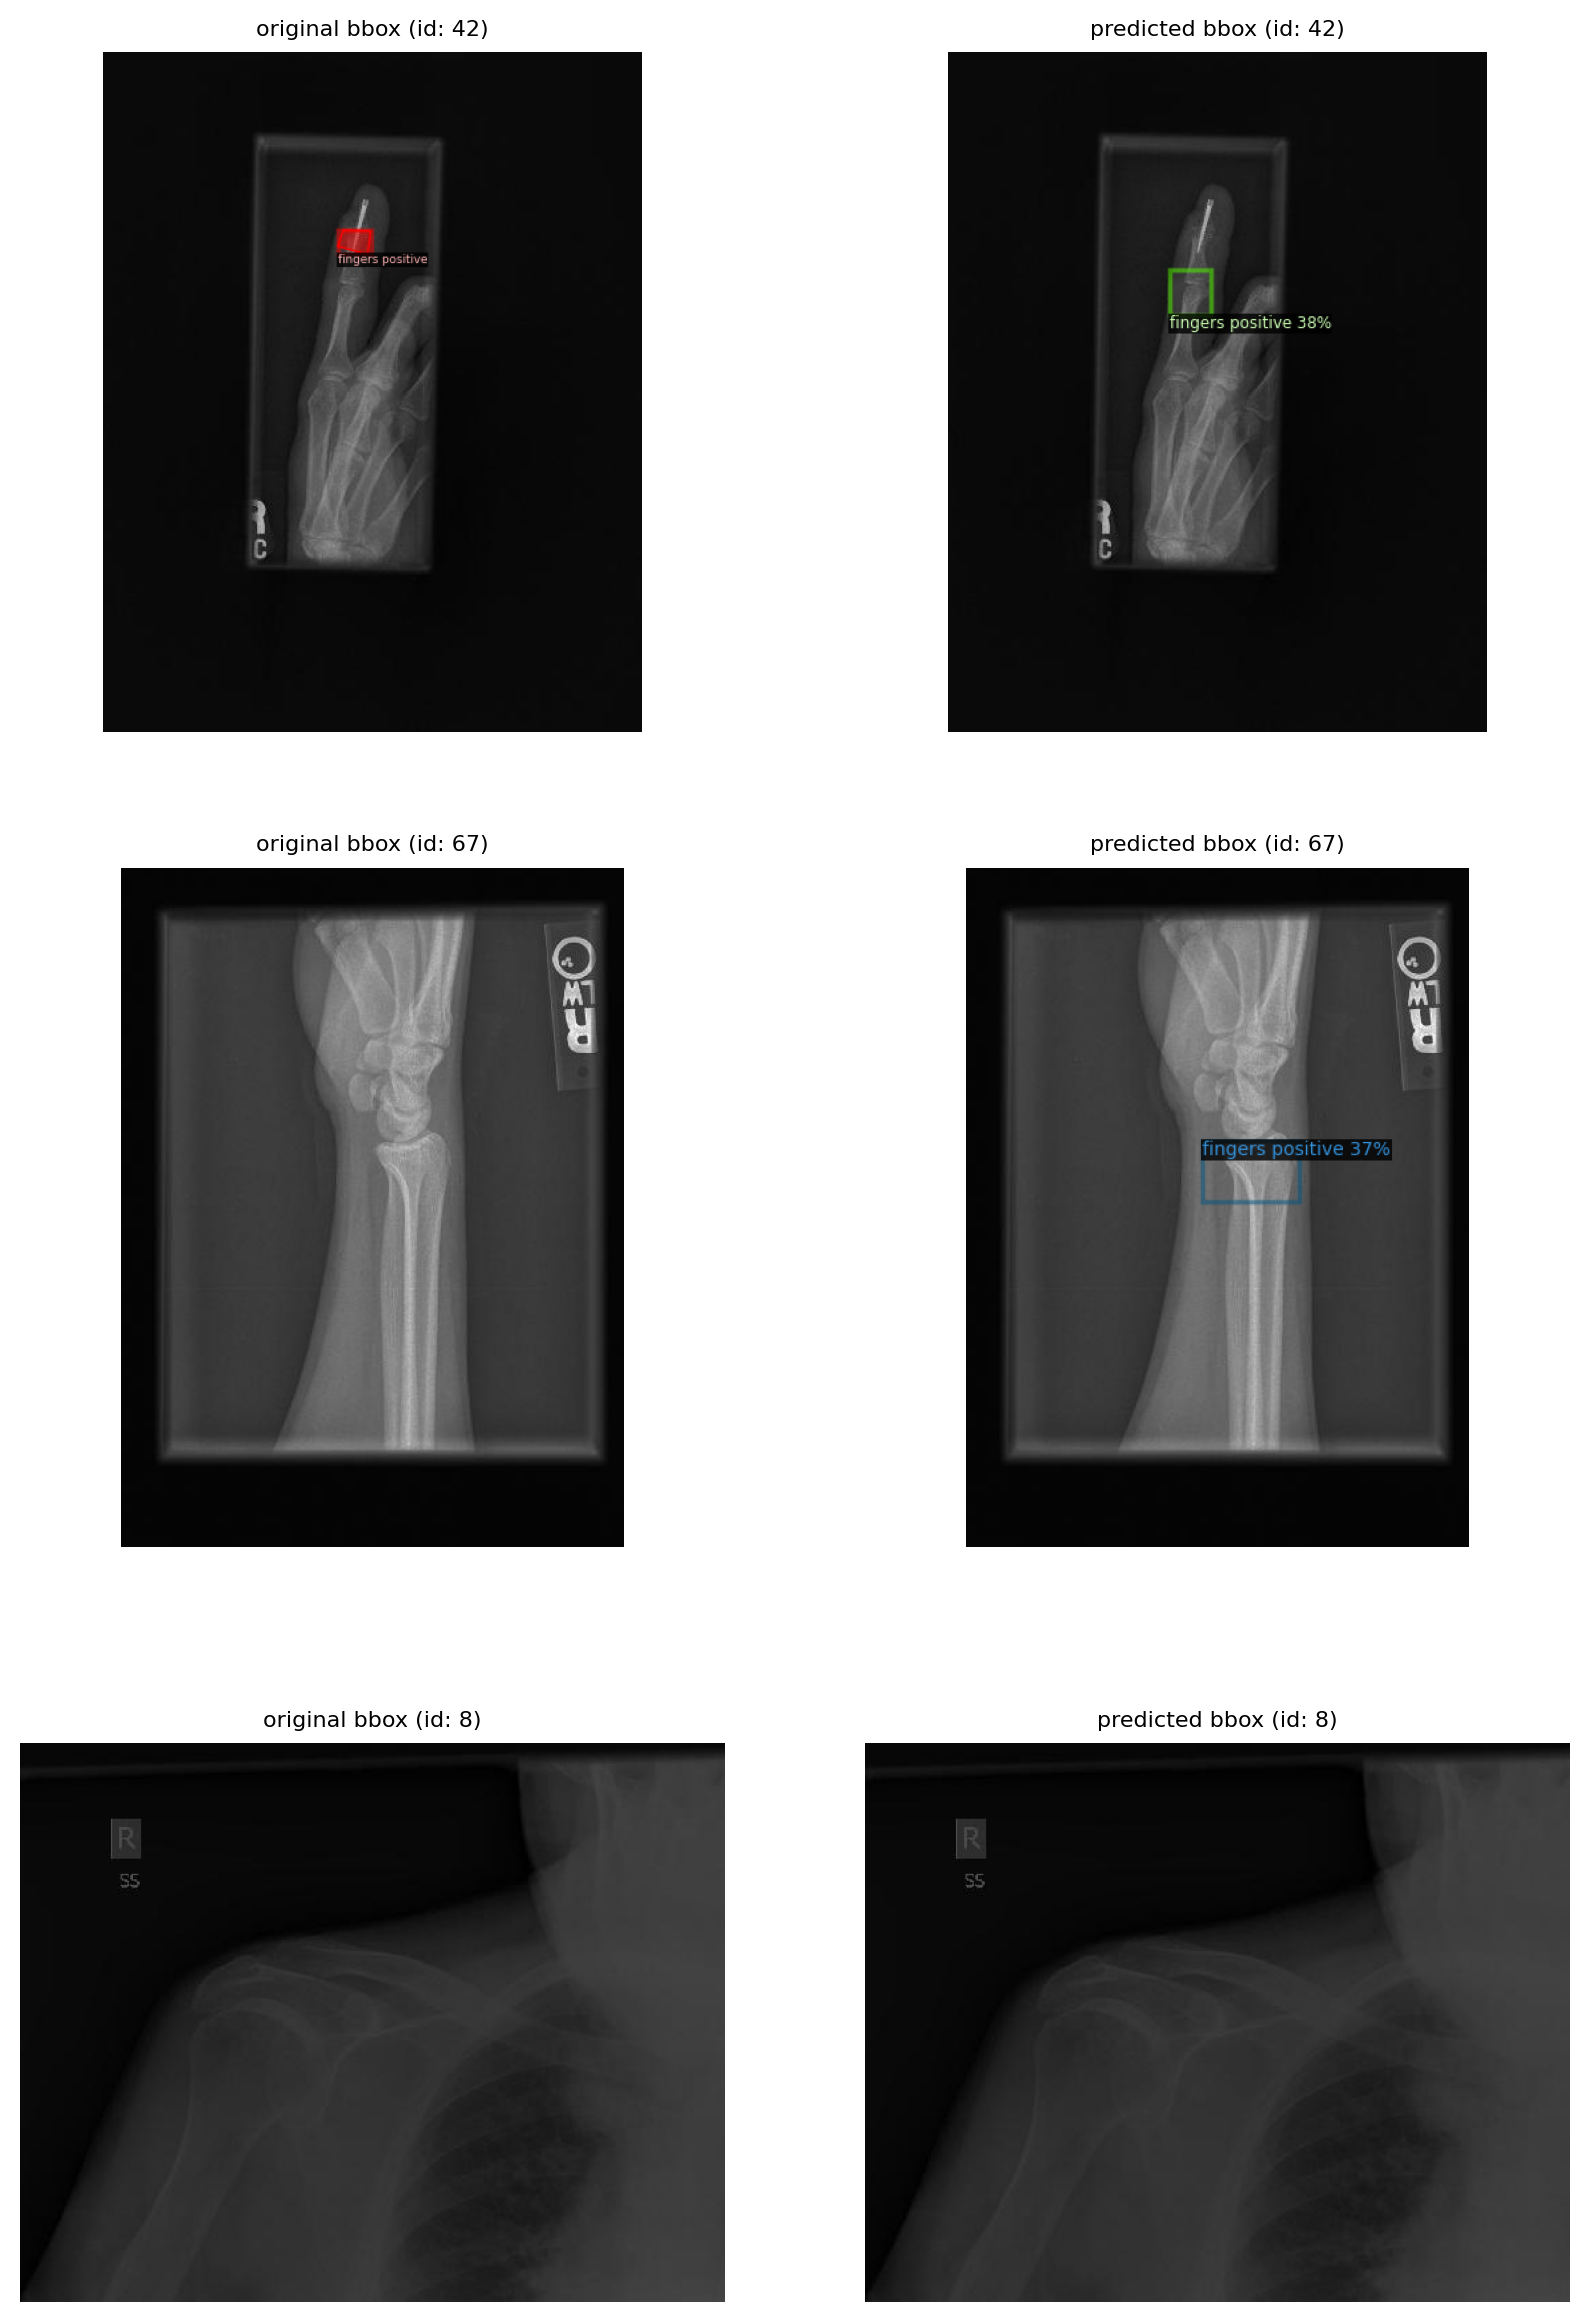

In [25]:
create_predictions(dataset_dicts,my_dataset_test_metadata,seed = 3, image_scale=1)
create_predictions(dataset_dicts,my_dataset_test_metadata,seed = 93, image_scale=1)
create_predictions(dataset_dicts,my_dataset_test_metadata,seed = 643, image_scale=1)

# <span style="color:#e74c3c;">Faster R-CNN w/ResNet-50 FPN </span> Model, Training

In [ ]:
from detectron2.engine import DefaultTrainer

EPOCHS = 2500
NUM_CLASSES = 8
BASE_LR = 0.001

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("bone_fractures_train")
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = BASE_LR
cfg.SOLVER.MAX_ITER = EPOCHS
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# uncomment below to train
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/25 09:02:00 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:01, 108MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[04/25 09:02:02 d2.engine.train_loop]: Starting training from iteration 0


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[04/25 09:02:13 d2.utils.events]:  eta: 0:19:36  iter: 19  total_loss: 2.189  loss_cls: 2.047  loss_box_reg: 0.01102  loss_rpn_cls: 0.1074  loss_rpn_loc: 0.01403    time: 0.5098  last_time: 0.4542  data_time: 0.0243  last_data_time: 0.0250   lr: 1.9981e-05  max_mem: 5913M
[04/25 09:02:23 d2.utils.events]:  eta: 0:19:21  iter: 39  total_loss: 1.33  loss_cls: 1.147  loss_box_reg: 0.02374  loss_rpn_cls: 0.1205  loss_rpn_loc: 0.0102    time: 0.5036  last_time: 0.4733  data_time: 0.0121  last_data_time: 0.0156   lr: 3.9961e-05  max_mem: 5913M
[04/25 09:02:33 d2.utils.events]:  eta: 0:20:18  iter: 59  total_loss: 0.3598  loss_cls: 0.2247  loss_box_reg: 0.02141  loss_rpn_cls: 0.1143  loss_rpn_loc: 0.01064    time: 0.5148  last_time: 0.4837  data_time: 0.0124  last_data_time: 0.0036   lr: 5.9941e-05  max_mem: 5913M
[04/25 09:02:43 d2.utils.events]:  eta: 0:20:08  iter: 79  total_loss: 0.2538  loss_cls: 0.07897  loss_box_reg: 0.02481  loss_rpn_cls: 0.1406  loss_rpn_loc: 0.01487    time: 0.5116 

In [ ]:
# Saving the model

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = THRESHOLD
predictor = DefaultPredictor(cfg)

import pickle
with open("cfg.pkl", "wb") as f:
    pickle.dump(cfg, f)

In [ ]:
# original code from https://eidos-ai.medium.com/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e

def reading_metrics_from_json(metrics_path):
    metrics = []

    with open(metrics_path, 'r') as f:
        for line in f:
            metrics.append(json.loads(line))
    return metrics


def metric(metrics, specific_metric):
    metric = []
    for i in range(len(metrics)):
        try:
            metric.append(metrics[i][specific_metric])
        except KeyError:
            pass

    return metric

In [ ]:
train_metrics = reading_metrics_from_json('/kaggle/working/output/metrics.json')

total_loss = metric(train_metrics, 'total_loss')
cls_acc = metric(train_metrics, 'fast_rcnn/cls_accuracy')
false_neg = metric(train_metrics, 'fast_rcnn/false_negative')
loss_box_reg = metric(train_metrics, 'loss_box_reg')
iters = np.arange(1,EPOCHS,EPOCHS/len(total_loss))

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (17, 4), dpi = 120)

fig.suptitle('Faster R-CNN w/ResNet-50 FPN Training Results', color = 'blue', fontsize=15,  style = "italic")

axs[0].grid(linestyle = 'dashdot')
axs[0].plot(iters, loss_box_reg)
axs[0].set_xlabel('epochs', fontsize = 10)
axs[0].set_title('Loss Box Regression', fontsize = 10)
tit0 = ' (the last value {0:.4f})'.format(loss_box_reg[-1])
axs[0].set_title('Loss Box Regression ' + tit0, fontsize = 10, color = 'red')

axs[1].grid(linestyle = 'dashdot')
axs[1].plot(iters, cls_acc)
axs[1].set_xlabel('epochs', fontsize = 10)
tit1 = ' (the last value {0:.3f})'.format(cls_acc[-1])
axs[1].set_title('Class Accuracy ' + tit1, fontsize = 10, color = 'red')

axs[2].grid(linestyle = 'dashdot')
axs[2].plot(iters, total_loss)
axs[2].set_xlabel('epochs', fontsize = 10)
tit2 = ' (the last value {0:.4f})'.format(total_loss[-1])
axs[2].set_title('Total Loss ' + tit2, fontsize = 10, color = 'red')

axs[3].grid(linestyle = 'dashdot')
axs[3].plot(iters, false_neg)
axs[3].set_xlabel('epochs', fontsize = 10)
axs[3].set_title('False Negative', fontsize = 10, color = 'red')

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("bone_fractures_test", False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, "bone_fractures_test")
inference_on_dataset(trainer.model, test_loader, evaluator)

In [ ]:
my_dataset_test_metadata = MetadataCatalog.get("bone_fractures_test")
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("bone_fractures_test")


# A function for plotting an original image's bbox and predicted bbox
def create_predictions(dataset_dict, dataset_metadata, seed, image_scale = 0.8):
    np.random.seed(seed=seed)
    images = np.random.permutation(dataset_dict)[:3]

    fig, axs = plt.subplots(3,2, figsize = (10,15), dpi = 200)

    for i in range(3):
        im = images[i]
        img_link = im['file_name']
        img_id = im['image_id']
        img = cv2.imread(img_link)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        visualizer1 = Visualizer(img, metadata= dataset_metadata, scale=image_scale)

        vis_original = visualizer1.draw_dataset_dict(im)
        original_bbox = vis_original.get_image()

        visualizer2 = Visualizer(img, metadata= dataset_metadata, scale=image_scale)
        outputs = predictor(img)
        out = visualizer2.draw_instance_predictions(outputs["instances"].to("cpu"))
        out_img = cv2.cvtColor(out.get_image(), cv2.COLOR_BGR2RGB)
        final_bbox = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)

        axs[i][0].set_title('original bbox (id: ' + str(img_id) +')', fontsize = 8)
        axs[i][0].axis('off')
        axs[i][0].imshow(original_bbox)

        axs[i][1].set_title('predicted bbox (id: ' + str(img_id) +')', fontsize = 8)
        axs[i][1].axis('off')
        axs[i][1].imshow(final_bbox)

In [ ]:
create_predictions(dataset_dicts,my_dataset_test_metadata,seed = 7, image_scale=1)
create_predictions(dataset_dicts,my_dataset_test_metadata,seed = 9, image_scale=1)
create_predictions(dataset_dicts,my_dataset_test_metadata,seed = 34, image_scale=1)